In [1]:
import pandas as pd
import numpy as np
from os import listdir
import json
import dataframe_image as dfi
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
import matplotlib.pyplot as plt
# def read_xml(filename):
#     with open(filename) as xml_file:

#         data_dict = xmltodict.parse(xml_file.read())
#         xml_file.close()

#         # generate the object using json.dumps()
#         # corresponding to json data

#         json_data = json.dumps(data_dict)
#     return data_dict

/var/folders/df/smvkcp7n6tbc3_1cv87ry5pm0000gn/T/ipykernel_44304/1290607183.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [2]:
path='./comm_use_subset/'
jsons = [path+i for i in listdir(path) if i[-4:]=='json']

In [3]:
#load json data files into list
jsons[0],len(jsons)

('./comm_use_subset/5e0c586f047ff909c8ed3fe171c8975a90608d08.json', 9315)

In [4]:
#read json data files lines into list
d=[]
for i in jsons[0:1000]:
    with open(i,'r') as f:
        data = json.loads(f.read())
    d.append(data)

In [5]:
#convert json data into dataframe
df_nested_list = pd.json_normalize(d)

In [6]:
#check datafile
df_nested_list.columns

Index(['paper_id', 'abstract', 'body_text', 'back_matter', 'metadata.title',
       'metadata.authors', 'bib_entries.BIBREF0.ref_id',
       'bib_entries.BIBREF0.title', 'bib_entries.BIBREF0.authors',
       'bib_entries.BIBREF0.year',
       ...
       'bib_entries.BIBREF134.other_ids.PMID',
       'bib_entries.BIBREF135.other_ids.PMID',
       'bib_entries.BIBREF137.other_ids.PMID',
       'bib_entries.BIBREF139.other_ids.PMID',
       'bib_entries.BIBREF141.other_ids.PMID',
       'bib_entries.BIBREF142.other_ids.PMID',
       'bib_entries.BIBREF26.other_ids.PMCID',
       'bib_entries.BIBREF39.other_ids.PMCID',
       'bib_entries.BIBREF20.other_ids.arXiv',
       'bib_entries.BIBREF43.other_ids.arXiv'],
      dtype='object', length=3437)

In [7]:
#only use paper_id, title, and body_text
df = pd.json_normalize(d,record_path =['body_text'],meta=['paper_id',['metadata','title']])

In [8]:
#check normalized dataframe
df.head()

,text,cite_spans,ref_spans,section,paper_id,metadata.title
0,"Porcine epidemic diarrhea virus (PEDV), which ...","[{'start': 233, 'end': 236, 'text': '[1,', 're...",[],Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
1,"First detected in the UK in 1971, PEDV resulte...","[{'start': 103, 'end': 106, 'text': '[6]', 're...",[],Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
2,PEDV is an enveloped single-strand RNA coronav...,"[{'start': 243, 'end': 247, 'text': '[10]', 'r...",[],Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
3,Little has been known about the components of ...,"[{'start': 243, 'end': 247, 'text': '[14]', 'r...",[],Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
4,The Vero E6 cell line was cultured and maintai...,[],[],"Cells, viruses and reagents",5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...


In [9]:
#delete useless columns.
df.drop(columns=['cite_spans','ref_spans'],inplace=True)

In [10]:
#check dataframe
df.head()

,text,section,paper_id,metadata.title
0,"Porcine epidemic diarrhea virus (PEDV), which ...",Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
1,"First detected in the UK in 1971, PEDV resulte...",Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
2,PEDV is an enveloped single-strand RNA coronav...,Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
3,Little has been known about the components of ...,Background,5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...
4,The Vero E6 cell line was cultured and maintai...,"Cells, viruses and reagents",5e0c586f047ff909c8ed3fe171c8975a90608d08,Neutralizing antibodies against porcine epidem...


In [11]:
#the papers are divided into paragraph, merge all paper with same title
df2 = pd.DataFrame(df.groupby(['paper_id','metadata.title'])['text'].apply(lambda x: ','.join(x.astype(str))))
# .set_index('paper_id')

In [12]:
df2=df2.reset_index()

In [13]:
df2=df2.set_index('paper_id')

In [14]:
df2.columns=['Title','Text']

In [15]:
#merge text and titles
df2['Text']=df2['Text']+" "+df2['Title']

In [16]:
#check dataframe
df2.head()

,Title,Text
paper_id,,
0080d3bd9fb92e022c27715c2d1249042aa998b8,Rational Design of a Live Attenuated Dengue Va...,Dengue virus (DENV) is a member of the Flavivi...
008d980cbcc283a9b707de3d9a02573dde8528ac,A pilot study-genetic diversity and population...,Snow leopard or ounce (Panthera uncia) has evo...
00951716e01c8e0cc341770389fc38d1b5455210,"Knowledge of, attitudes toward, and preventive...","Cholera is a waterborne, life-threatening form..."
00ae0041374cbbf28df0d2cbeb08c1396a4f7878,Enzyme assays for synthesis and degradation of...,"Background 5′-triphosphorylated, 2′-5′-linked ..."
00c19aff3efc6e6430f77d81580ac927990ad5a2,Utility of bronchoalveolar lavage in the manag...,Lung infiltrates cause significant morbidity a...


In [17]:
#preprocessing TF-IDF
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in "!\"#$%&'()*+,./:;<=>?@[\]^`{|}~"])
    return punctuationfree
#storing the puntuation free text
# data['clean_msg']= data['v2'].apply(lambda x:remove_punctuation(x))
# data.head()
#!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens
#applying function to the column
# data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

#importing nlp library

In [18]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
# stopwords[0:10]
# ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output
#applying the function
# data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
# data['msg_stemmed']=data['no_sw_msg'].apply(lambda x: stemming(x))

from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
# data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

#defining a function to remove single character words
def remove_single_words(text):
    w = [word for word in text if len(word)>1]
    return w

#defining a function to remove numbers started words
def remove_numbers(text):
    w = [i for i in text if re.search("[0-9]", i[0]) is None]
    return w

#defining a function to remove unwanted characters
def remove_noncharacter(text):
    w = [i for i in text if bool(re.match("^[0-9a-zA-Z]+$", i)) is True]
    return w

def list_to_string(inlist):
        stt = " ".join([i for i in inlist])
        return stt

### this is notessf<font size=2>test</font>


In [19]:
df2['pp1'] = df2['Text'].progress_apply(lambda x : remove_punctuation(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x: x.lower())
df2['pp1'] = df2['pp1'].progress_apply(lambda x : tokenization(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x : remove_stopwords(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x : stemming(x))
#df2['pp1'] = df2['pp1'].apply(lambda x : lemmatizer(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x : remove_single_words(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x : remove_numbers(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x : remove_noncharacter(x))
df2['pp1'] = df2['pp1'].progress_apply(lambda x : list_to_string(x))

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [20]:
df=df2
df.rename(columns={'pp1':'body_text'},inplace=True)

100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 75.51it/s]


aaa
Total: 1000

{'ca': 23,
 'de': 1,
 'en': 906,
 'fr': 5,
 'it': 12,
 'lv': 1,
 'pt': 1,
 'ro': 49,
 'sl': 1,
 'sv': 1}


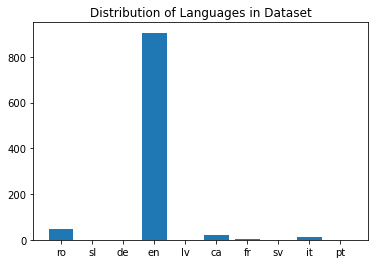

In [21]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)
print("aaa")
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer(max_df=0.9,min_df=0.1)

In [26]:
corpus = df2['body_text']

In [27]:
X = vectorizer.fit_transform(corpus)

In [28]:
df3 = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

/Users/zhuoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
#check vectorized scores
df3

,abil,abl,abnorm,absenc,absent,absolut,absorb,abund,accept,access,...,world,worldwid,would,written,year,yellow,yet,yield,young,zoonot
0,0.000000,0.004388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014045,0.000000,...,0.000000,0.000000,0.022306,0.000000,0.003936,0.007771,0.000000,0.000000,0.000000,0.0
1,0.013952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011330,0.000000,0.000000,0.000000,0.000000,0.017104,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007751,0.000000,0.010489,...,0.006211,0.007214,0.017491,0.008923,0.013889,0.000000,0.000000,0.000000,0.000000,0.0
3,0.008975,0.004301,0.000000,0.000000,0.000000,0.000000,0.054385,0.000000,0.006884,0.004371,...,0.000000,0.000000,0.010933,0.000000,0.000000,0.022854,0.014631,0.033008,0.000000,0.0
4,0.000000,0.000000,0.016252,0.000000,0.000000,0.015662,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008232,0.000000,0.000000,0.269930,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
996,0.000000,0.000000,0.021605,0.000000,0.021487,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014681,0.000000,0.010335,0.000000,0.043772,0.000000,0.000000,0.000000,0.000000,0.0
997,0.003584,0.000000,0.000000,0.000000,0.006050,0.000000,0.000000,0.000000,0.000000,0.010471,...,0.000000,0.000000,0.000000,0.000000,0.015407,0.000000,0.011684,0.004393,0.000000,0.0
998,0.006780,0.006498,0.000000,0.049598,0.000000,0.011091,0.000000,0.000000,0.000000,0.000000,...,0.007821,0.009084,0.005506,0.000000,0.005829,0.034528,0.014736,0.016623,0.000000,0.0


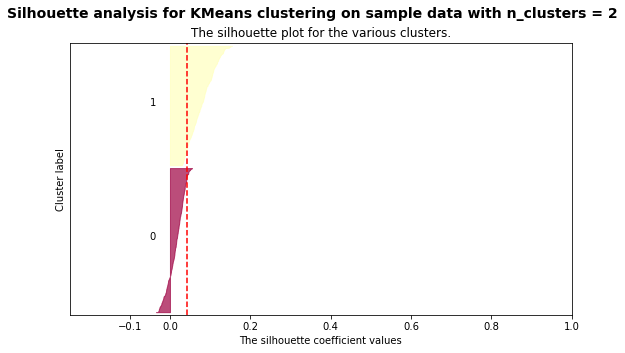

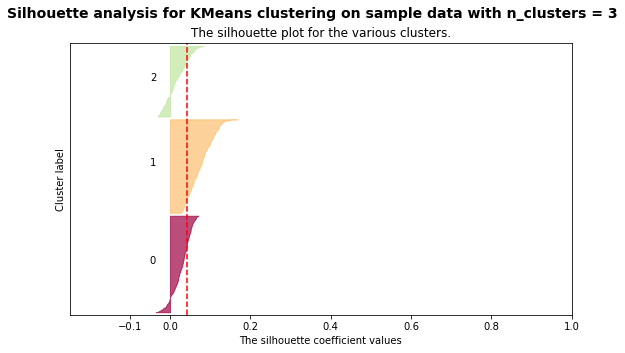

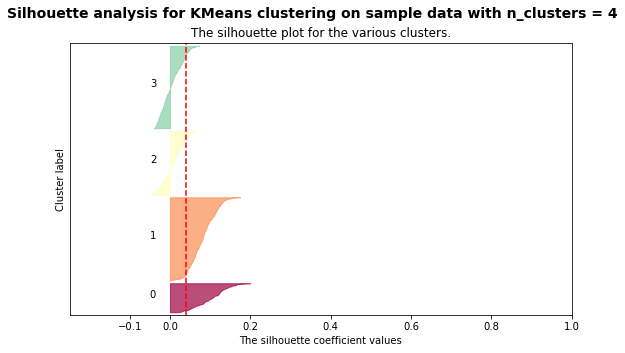

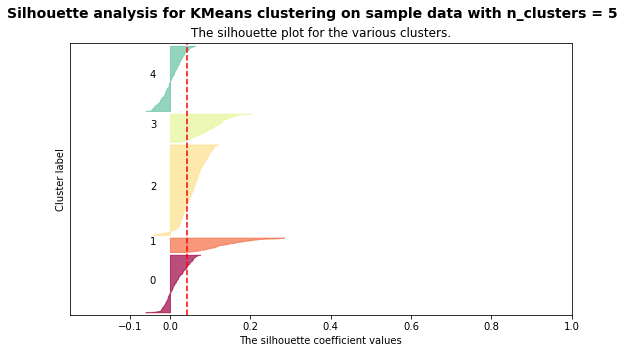

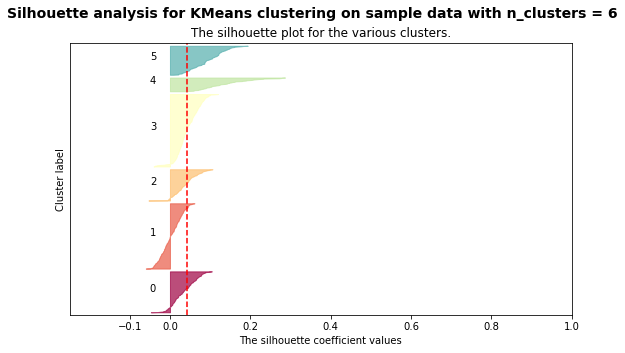

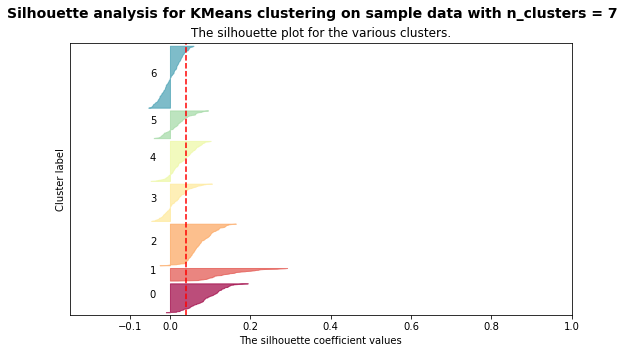

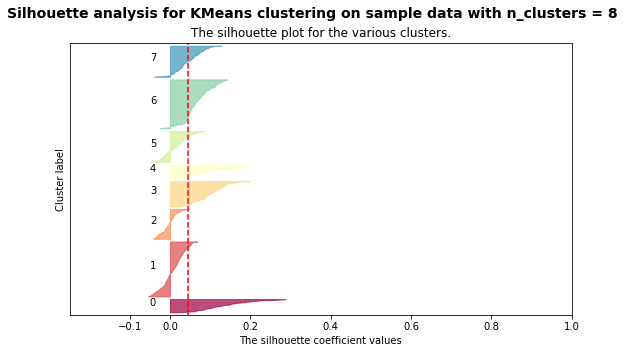

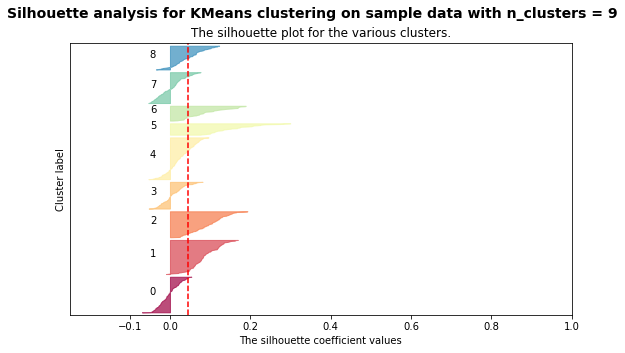

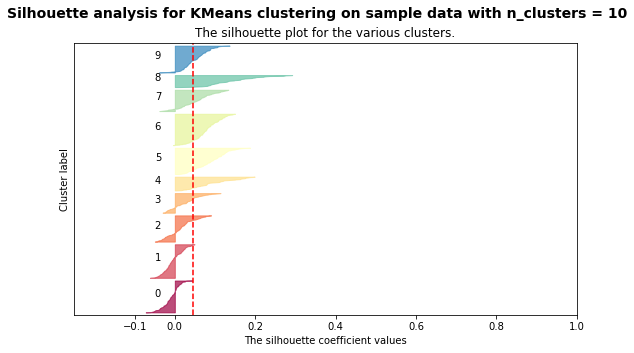

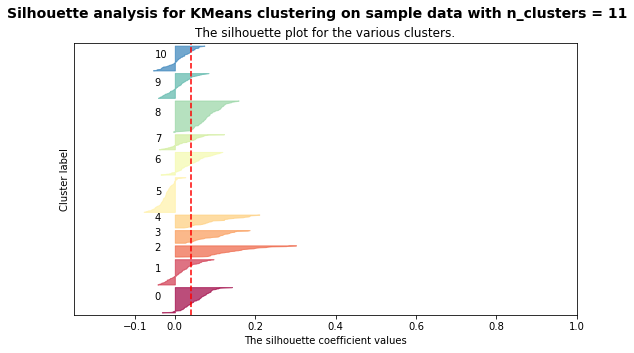

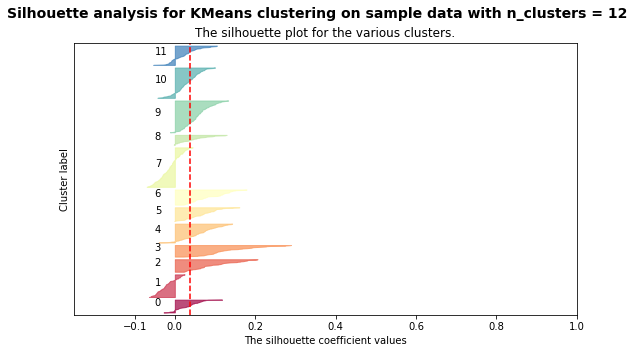

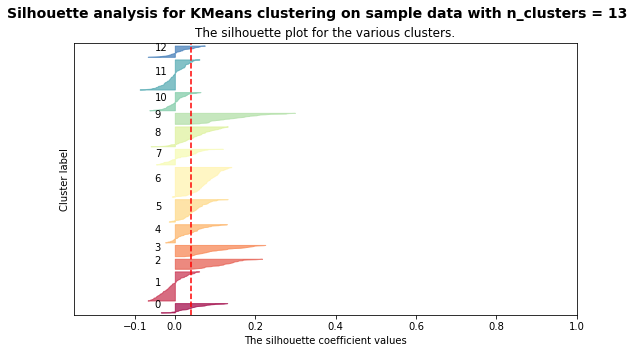

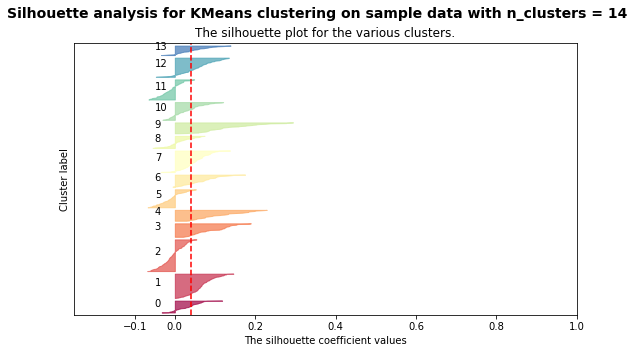

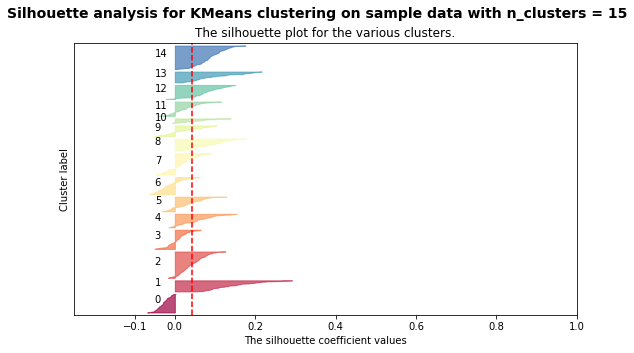

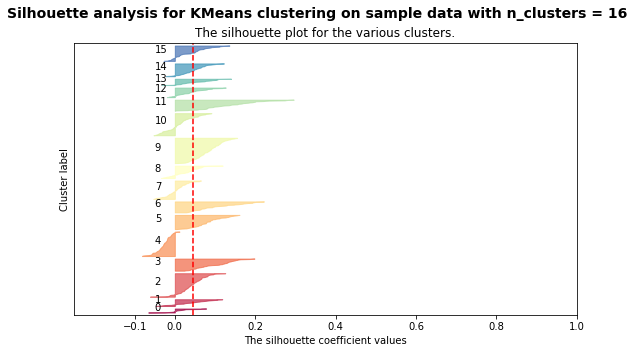

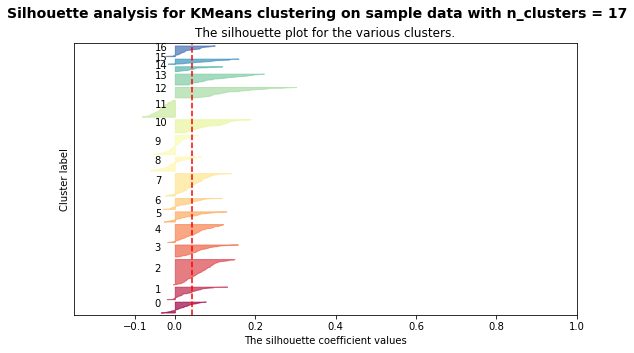

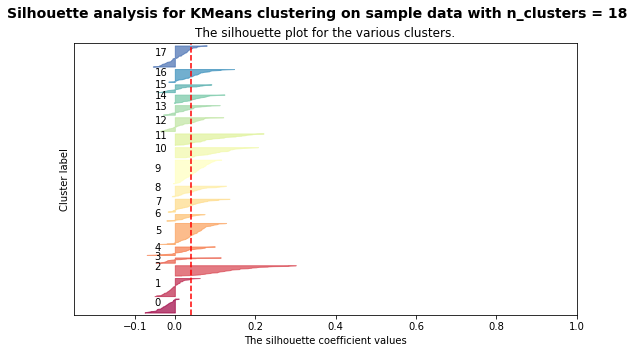

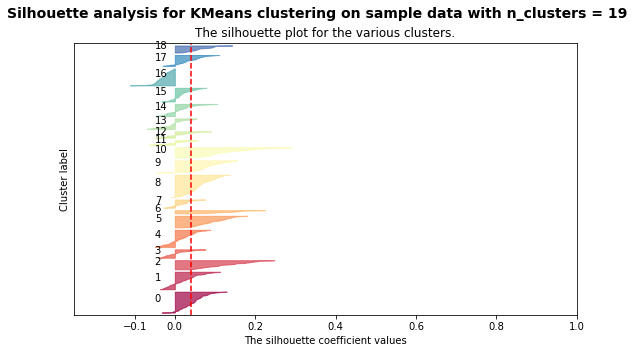

In [30]:
#make silhouette plot using clusters numbers
import sklearn.metrics
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster

# Cast your table 'pivoted' as a matrix with to_numpy(), and store it in a variable X 
X = df3.to_numpy()

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 20))

# Make an empty list called avg_silhouette_scores
avg_silhouette_scores = []

# Iterate through Krange with variable K as before
for K in Krange:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # Call set_xlim on ax1 
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = sklearn.cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Make a variable called silhouette_avg. Set the parameters to silhouette_score to X, and cluster_labels
    silhouette_avg  = sklearn.metrics.silhouette_score(X, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    # Call sklearn.metrics.silhouette_samples with the below parameters
    sample_silhouette_values =sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        # Make a variable called ith_cluster_silhouette_values
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        # Call sort() on this variable 
        ith_cluster_silhouette_values.sort()
    
        # Call shape[0] on ith_cluster_silhouette_values 
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        # This requires calling text() on ax1 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting title, xlabel and ylabel 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    # This requires axvline() 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % K),
                 fontsize=14, fontweight='bold')

Text(0, 0.5, 'Average Silhouette Score')

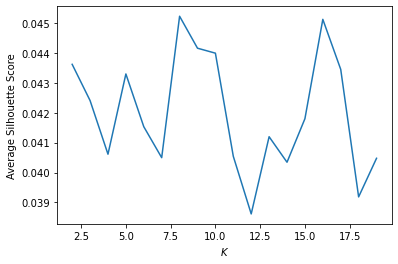

In [31]:
# Computing the avrage silhouette score for each K and plotting it 
# Call plot() with parameters KRange, avg_silhouette_scores
plt.plot(Krange, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

Text(0, 0.5, 'Sum of Squares')

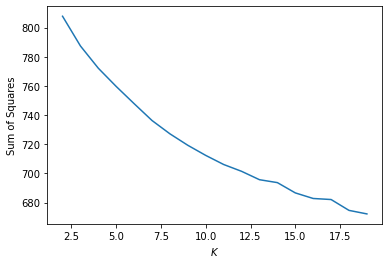

In [44]:
# make elbow plot with cluster numbers between 2 to 20
import sklearn.cluster
import numpy as np

# Make an empty list
ss = []

# Make an empty dictionary called assignments 
assignments = {}

# Cast your table 'pivoted' as a matrix with to_numpy(), and store it in a variable X 
X = df3.to_numpy()

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 20))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

# Can you see what we're doing here? 

In [33]:
#7 clusters looks better, do n_cluster with number of 7
modelf = sklearn.cluster.KMeans(n_clusters=5)
assigned_cluster = modelf.fit_predict(X)
centers = modelf.cluster_centers_

In [34]:
print(centers)

[[0.00186422 0.0033188  0.00684951 ... 0.0075506  0.01171113 0.00032054]
 [0.00830266 0.00743529 0.00506483 ... 0.00521865 0.00494814 0.00357571]
 [0.00557886 0.00583027 0.00076417 ... 0.00586639 0.00241334 0.00541135]
 [0.01193479 0.00931391 0.00154672 ... 0.0050174  0.0012796  0.00240925]
 [0.00454902 0.00525252 0.00110547 ... 0.00349658 0.00579563 0.00857816]]


In [35]:
dfc = pd.DataFrame(centers,columns=df3.columns).T
for i in range(5):
    print(list(dfc.sort_values(by=i,ascending=False).index)[0:15])

['patient', 'respiratori', 'infect', 'children', 'pneumonia', 'detect', 'viral', 'hospit', 'case', 'clinic', 'virus', 'influenza', 'rsv', 'age', 'sampl']
['mice', 'cell', 'vaccin', 'infect', 'immun', 'anim', 'viru', 'al', 'et', 'antibodi', 'express', 'respons', 'lung', 'day', 'group']
['sequenc', 'protein', 'genom', 'gene', 'sampl', 'strain', 'viru', 'rna', 'virus', 'fig', 'structur', 'al', 'et', 'speci', 'viral']
['cell', 'protein', 'infect', 'express', 'viru', 'activ', 'viral', 'inhibit', 'fig', 'figur', 'ifn', 'replic', 'gene', 'bind', 'rna']
['health', 'case', 'diseas', 'infect', 'outbreak', 'transmiss', 'influenza', 'model', 'data', 'contact', 'countri', 'epidem', 'public', 'network', 'surveil']


In [36]:
modelf.predict(X)

array([1, 2, 4, 2, 0, 3, 3, 4, 0, 2, 3, 4, 1, 2, 2, 2, 0, 4, 1, 2, 4, 3,
       3, 2, 0, 0, 3, 3, 3, 1, 4, 3, 2, 3, 2, 4, 3, 2, 2, 2, 1, 2, 3, 3,
       3, 4, 4, 3, 2, 1, 3, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 1, 2, 0, 2, 1,
       0, 4, 1, 2, 4, 4, 4, 2, 3, 1, 2, 1, 1, 2, 1, 4, 2, 4, 0, 1, 2, 4,
       3, 4, 1, 3, 2, 3, 4, 0, 4, 0, 4, 2, 0, 0, 2, 0, 1, 1, 2, 4, 2, 2,
       3, 1, 2, 0, 3, 2, 2, 2, 4, 3, 3, 4, 3, 2, 2, 2, 2, 3, 2, 1, 1, 4,
       0, 4, 4, 1, 4, 1, 1, 2, 4, 0, 0, 3, 2, 4, 2, 1, 1, 2, 3, 1, 2, 3,
       0, 2, 0, 0, 3, 4, 0, 0, 3, 3, 4, 2, 3, 3, 4, 2, 3, 1, 1, 4, 3, 1,
       4, 0, 3, 2, 3, 4, 4, 4, 4, 4, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 4, 1,
       1, 3, 3, 1, 2, 4, 4, 2, 3, 3, 2, 3, 2, 0, 4, 4, 0, 2, 0, 2, 2, 4,
       3, 2, 3, 4, 3, 4, 2, 3, 4, 4, 3, 4, 2, 3, 0, 4, 3, 1, 2, 1, 3, 2,
       1, 4, 0, 2, 3, 3, 3, 1, 3, 3, 2, 2, 1, 1, 1, 2, 4, 1, 4, 4, 4, 2,
       1, 2, 1, 2, 4, 0, 1, 2, 4, 1, 2, 0, 4, 3, 4, 3, 1, 1, 1, 2, 4, 2,
       1, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 1, 1, 2, 4,

In [37]:
modelf.transform(X)

array([[1.00425559, 0.77221124, 0.91202882, 0.82450787, 0.97230764],
       [1.04705013, 0.96851913, 0.9296003 , 1.06302103, 0.99158087],
       [1.02490758, 1.00934792, 1.01767522, 1.09779182, 0.92673235],
       ...,
       [1.05582542, 0.96302883, 0.85229955, 1.02258858, 0.98532542],
       [1.01252373, 0.86336158, 0.91126163, 0.72132731, 0.98202389],
       [0.78742168, 0.97405713, 0.94649788, 1.02405951, 0.90632886]])

In [38]:
df_dist = pd.DataFrame(modelf.transform(X),index=df2.index)
cluster = pd.DataFrame(columns=df2.columns)
for i in range(5):
    cluster.loc[i] = df2.loc[df_dist.sort_values(by=i).index[0]]

In [39]:
cluster.Title.values

array(['Viruses as Sole Causative Agents of Severe Acute Respiratory Tract Infections in Children',
       'Protective immunity by an engineered DNA vaccine for Mayaro virus',
       'A metagenomic viral discovery approach identifies potential zoonotic and novel mammalian viruses in Neoromicia bats within South Africa',
       'Proteomics informed by transcriptomics for characterising differential cellular susceptibility to Nelson Bay orthoreovirus infection',
       'Ebola in the Eastern Democratic Republic of Congo: One Health approach to infectious disease control'],
      dtype=object)

In [40]:
cluster.iloc[2].Text

'a1111111111 a1111111111 a1111111111 a1111111111 a1111111111,The role of bats as potential or confirmed reservoirs of various viral agents with public health importance has been increasingly appreciated in recent years. Several bat-borne viruses are considered emerging, with an increase in the number of human cases and outbreaks over the past two decades; such as the bat-borne viruses Marburg virus and Nipah virus [1, 2] . These viruses are associated with direct zoonotic transmission and infection of exposed human populations. Other identified bat-associated viruses are only related to viruses of known public health importance, like the severe acute respiratory syndrome coronavirus (SARS-CoV) or Middle East respiratory syndrome coronavirus (MERS-CoV) [3] [4] [5] . Though no direct spillover have been identified, overall sequence similarities between human viral strains and related batborne viruses have implicated these viruses in the emergence of new human coronaviruses [6, 7] . Detec

In [41]:
# clusters looks better, do n_cluster with number of 5
modelf = sklearn.cluster.KMeans(n_clusters=5)
assigned_cluster = modelf.fit_predict(X)
centers = modelf.cluster_centers_
df_dist = pd.DataFrame(modelf.transform(X),index=df2.index)
cluster = pd.DataFrame(columns=df2.columns)
for i in range(5):
    cluster.loc[i] = df2.loc[df_dist.sort_values(by=i).index[0]]

In [42]:
cluster

,Title,Text,body_text,language
0,Proteomics informed by transcriptomics for cha...,Nelson Bay orthoreovirus (NBV) is the prototyp...,nelson bay orthoreoviru nbv prototyp member pt...,en
1,Viruses as Sole Causative Agents of Severe Acu...,Worldwide acute respiratory tract infections (...,worldwid acut respiratori tract infect arti am...,ro
2,viruses Characterization of a New Member of Al...,Members of the Coronaviridae family are envelo...,member coronavirida famili envelop rna virus g...,en
3,Ebola in the Eastern Democratic Republic of Co...,The Democratic Republic of Congo (DRC) has bee...,democrat republ congo drc face tenth outbreak ...,en
4,A Disintegrin and Metalloprotease 17 in the Ca...,"A Disintegrin and Metalloproteases (ADAM), ori...",disintegrin metalloproteas adam origin name me...,en


In [43]:
(X - centers[assigned_cluster]).min()

-0.2940374877017422